In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

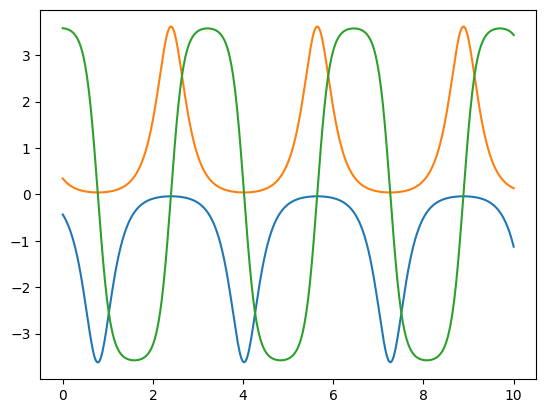

In [2]:
data = sio.loadmat("./data/ko_data_2.mat")
t_test = data["t"]
u_test = data["y"]

plt.plot(t_test, u_test[:, 0:1])
plt.plot(t_test, u_test[:, 1:2])
plt.plot(t_test, u_test[:, 2:3])
plt.show()

t_train = t_test[::20]
u_train = u_test[::20]
f_train = np.zeros_like(u_train)

In [3]:
model = models.PINN()

In [4]:
loss = model.train(t_train, f_train, t_train, u_train, niter=100000)

0 5.4143167
1000 2.0804195
2000 0.18636546
3000 0.058538143
4000 0.02489361
5000 0.016235486
6000 0.014232319
7000 0.010267237
8000 0.002171257
9000 0.0010734529
10000 0.0008197088
11000 0.00070695044
12000 0.0009446764
13000 0.00053766766
14000 0.00069374323
15000 0.00045727147
16000 0.0010410661
17000 0.0007286959
18000 0.0004465736
19000 0.00033756573
20000 0.00037214265
21000 0.00031691184
22000 0.00031600412
23000 0.0003361113
24000 0.00048797525
25000 0.00025986996
26000 0.0010678347
27000 0.0002753333
28000 0.00021445316
29000 0.0006049973
30000 0.00020297579
31000 0.00051770825
32000 0.00021845795
33000 0.0015364195
34000 0.00019129136
35000 0.00020250751
36000 0.0005298811
37000 0.00017075824
38000 0.00016818604
39000 0.00016266345
40000 0.00040109907
41000 0.0002858744
42000 0.0001635675
43000 0.00022546573
44000 0.00015920878
45000 0.00029805268
46000 0.00044134606
47000 0.00016472796
48000 0.00094265473
49000 0.00026280538
50000 0.00013025173
51000 0.0001298942
52000 0.0003

In [5]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

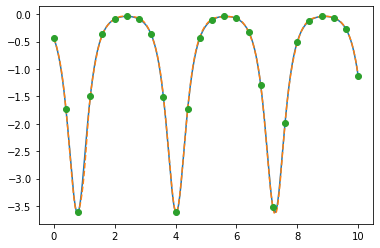

In [6]:
plt.plot(t_test, u_test[:, 0:1])
plt.plot(t_test, u_pred[:, 0:1], "--")
plt.plot(t_train, u_train[:, 0:1], "o")
plt.show()

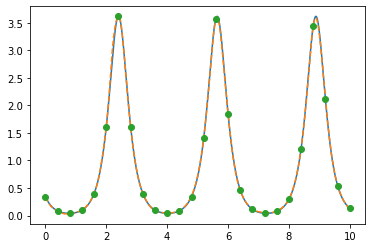

In [7]:
plt.plot(t_test, u_test[:, 1:2])
plt.plot(t_test, u_pred[:, 1:2], "--")
plt.plot(t_train, u_train[:, 1:2], "o")
plt.show()

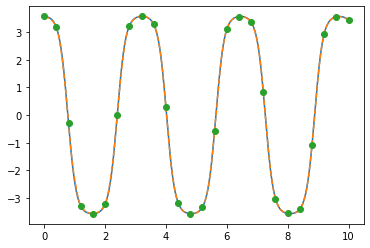

In [8]:
plt.plot(t_test, u_test[:, 2:3])
plt.plot(t_test, u_pred[:, 2:3], "--")
plt.plot(t_train, u_train[:, 2:3], "o")
plt.show()

In [9]:
print("a:", model.a.numpy())
print("b:", model.b.numpy())
print("c:", model.c.numpy())
print("d:", model.d.numpy())

a: 1.0272475
b: -0.9671987
c: -1.0128813
d: 0.97776085
